# Multi-Agent Systems

In [9]:
import os
import sys
import random
import json
from pydantic import BaseModel, Field
from dataclasses import dataclass, field
import plotext
import numpy

from typing import Annotated, Literal, Sequence, Union, List, Dict
from typing_extensions import TypedDict

from langchain_core.messages import HumanMessage, SystemMessage, BaseMessage, FunctionMessage
from langchain_openai import ChatOpenAI
from langchain_community.tools import TavilySearchResults
from langgraph.graph import StateGraph, START, END
from langgraph.prebuilt import ToolNode
from langgraph.graph.message import add_messages
from langchain_core.tools import tool
from langgraph.checkpoint.memory import MemorySaver
from langchain_core.messages import ToolMessage

from IPython.display import Image, display

sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

from lib.utils import set_chatgpt_env, set_langsmith_env, set_tavily_env

In [10]:
set_langsmith_env()
set_chatgpt_env()
set_tavily_env()

## Plotting

In [11]:
x = [1, 2, 3, 4, 5]
y = [10, 15, 7, 20, 18]

plotext.clear_figure()
plotext.plot(x, y)
plotext.title("Line Plot Example")
plotext.xlabel("X Axis")
plotext.ylabel("Y Axis")
plotext.show()

                                  Line Plot Example                             
    ┌──────────────────────────────────────────────────────────────────────────┐
20.0┤                                                      ▗▚▄▄▄               │
    │                                                     ▗▘    ▀▀▀▚▄▄▄▖       │
    │                                                    ▗▘            ▝▀▀▀▄▄▄▄│
17.8┤                                                   ▗▘                     │
    │                                                  ▗▘                      │
15.7┤                                                 ▄▘                       │
    │                  ▗                             ▞                         │
    │               ▗▄▀▘▚▖                          ▞                          │
13.5┤            ▗▄▀▘    ▝▚▖                       ▞                           │
    │         ▗▄▀▘         ▝▚▖                    ▞                            │
    │      ▗▄▀▘             

In [12]:
x = [1, 2, 3, 4, 5, 6, 7]
y = [10, 15, 8, 22, 30, 18, 25]

plotext.clear_figure()
plotext.scatter(x, y)
plotext.title("Scatter Plot Example")
plotext.show()

                                Scatter Plot Example                            
    ┌──────────────────────────────────────────────────────────────────────────┐
30.0┤                                                 ▘                        │
    │                                                                          │
    │                                                                          │
26.3┤                                                                          │
    │                                                                         ▝│
    │                                                                          │
22.7┤                                     ▖                                    │
    │                                                                          │
19.0┤                                                                          │
    │                                                             ▗            │
    │                       

In [13]:
categories = ["Apples", "Bananas", "Cherries", "Dates"]
values = [10, 25, 15, 30]

plotext.clear_figure()
plotext.bar(categories, values)
plotext.title("Bar Chart Example")
plotext.show()

                                 Bar Chart Example                              
  ┌────────────────────────────────────────────────────────────────────────────┐
30┤                                                           █████████████████│
  │                                                           █████████████████│
  │                                                           █████████████████│
25┤                    █████████████████                      █████████████████│
  │                    █████████████████                      █████████████████│
  │                    █████████████████                      █████████████████│
20┤                    █████████████████                      █████████████████│
  │                    █████████████████                      █████████████████│
15┤                    █████████████████  █████████████████   █████████████████│
  │                    █████████████████  █████████████████   █████████████████│
  │                    █████

In [14]:
data = numpy.random.randint(1, 100, 100)

plotext.clear_figure()
plotext.hist(data, bins=10)
plotext.title("Histogram Example")
plotext.show()

                                  Histogram Example                             
    ┌──────────────────────────────────────────────────────────────────────────┐
15.0┤                                             ███████               ███████│
    │                              ███████        ███████               ███████│
    │                              ██████████████ ███████               ███████│
12.5┤                              ██████████████ ███████               ███████│
    │                              ██████████████ ███████               ███████│
    │                              ██████████████ ███████               ███████│
10.0┤███████               ███████ ██████████████ ███████               ███████│
    │███████               ███████ ██████████████ ███████        ██████████████│
 7.5┤███████               ███████ ██████████████ ███████        ██████████████│
    │███████               ███████ ██████████████ ███████        ██████████████│
    │███████               █

In [15]:
x = [1, 2, 3, 4, 5]
y1 = [10, 15, 7, 20, 18]
y2 = [5, 12, 14, 25, 22]

plotext.clear_figure()
plotext.plot(x, y1, label="Dataset 1")  # Label is automatically used for legend
plotext.plot(x, y2, label="Dataset 2")

plotext.title("Multiple Line Plots")
plotext.show()

                                 Multiple Line Plots                            
    ┌──────────────────────────────────────────────────────────────────────────┐
25.0┤ ▞▞ Dataset 1                                         ▗▚▄▄▄               │
    │ ▞▞ Dataset 2                                       ▗▞▘    ▀▀▀▚▄▄▄▖       │
    │                                                  ▗▞▘             ▝▀▀▀▄▄▄▄│
21.7┤                                                ▗▞▘                       │
    │                                              ▗▞▘      ▖                  │
    │                                             ▄▘      ▗▞▝▀▀▀▀▀▚▄▄▄▄▄▖      │
18.3┤                                           ▄▀       ▄▘             ▝▀▀▀▀▀▀│
    │                                         ▄▀       ▗▀                      │
15.0┤                  ▗                    ▄▀       ▗▞▘                       │
    │              ▗▄▞▀▘▀▄▖               ▄▀        ▄▘                         │
    │          ▗▄▞▀▘      ▝▚

In [29]:
def generate_bar_graph(data: Dict[str, float], title: str) -> str:
    cats = list(data.keys())
    vals = list(data.values())
    plotext.clear_figure()
    plotext.bar(cats, vals)
    plotext.title(title)
    return plotext.build()

def generate_horizontal_bar_graph(data: Dict[str, float], title: str) -> str:
    cats = list(data.keys())
    vals = list(data.values())
    plotext.clear_figure()
    plotext.bar(cats, vals, orientation="h", width=0.5)
    plotext.title(title)
    return plotext.build()

def generate_line_graph(x: List[float], y: List[float], title: str) -> str:
    plotext.clear_figure()
    plotext.plot(x, y)
    plotext.title(title)
    return plotext.build()

def generate_scatter_plot(x: List[float], y: List[float], title: str) -> str:
    plotext.clear_figure()
    plotext.scatter(x, y)
    plotext.title(title)
    return plotext.build()
    
def generate_histogram(data: List[float], title: str, num_bins: int = 10) -> str:
    plotext.clear_figure()
    plotext.hist(data, bins=num_bins)
    plotext.title(title)
    return plotext.build()
    
def generate_multiple_line_graphs(data: Dict[str, List[float]], title: str) -> str:
    plotext.clear_figure()
    for key, values in data.items():
        plotext.plot(values, label=key)
    plotext.title(title)
    plotext.legend()
    return plotext.build()

In [17]:
print(generate_bar_graph({"A": 1, "B": 2, "C": 3}, "Bar Chart Example"))

                                  Bar Chart Example                             
    ┌──────────────────────────────────────────────────────────────────────────┐
3.00┤                                                    ██████████████████████│
    │                                                    ██████████████████████│
    │                                                    ██████████████████████│
2.50┤                                                    ██████████████████████│
    │                                                    ██████████████████████│
    │                                                    ██████████████████████│
2.00┤                          ██████████████████████    ██████████████████████│
    │                          ██████████████████████    ██████████████████████│
1.50┤                          ██████████████████████    ██████████████████████│
    │                          ██████████████████████    ██████████████████████│
    │                       

In [18]:
print(generate_line_graph([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], "Line Chart Example"))

                                 Line Chart Example                             
    ┌──────────────────────────────────────────────────────────────────────────┐
5.00┤                                                                       ▗▄▞│
    │                                                                   ▗▄▞▀▘  │
    │                                                               ▗▄▞▀▘      │
4.33┤                                                           ▗▄▞▀▘          │
    │                                                       ▄▄▞▀▘              │
    │                                                  ▗▄▄▀▀                   │
3.67┤                                              ▄▄▞▀▘                       │
    │                                         ▗▄▄▀▀                            │
3.00┤                                     ▄▄▞▀▘                                │
    │                                 ▄▄▀▀                                     │
    │                       

In [19]:
print(generate_scatter_plot([1, 2, 3, 4, 5], [1, 2, 3, 4, 5], "Scatter Plot Example"))

                                Scatter Plot Example                            
    ┌──────────────────────────────────────────────────────────────────────────┐
5.00┤                                                                         ▝│
    │                                                                          │
    │                                                                          │
4.33┤                                                                          │
    │                                                       ▖                  │
    │                                                                          │
3.67┤                                                                          │
    │                                                                          │
3.00┤                                     ▖                                    │
    │                                                                          │
    │                       

In [20]:
print(generate_histogram(numpy.random.randint(1, 100, 100), "Histogram Example"))

                                  Histogram Example                             
    ┌──────────────────────────────────────────────────────────────────────────┐
14.0┤                                                            ███████       │
    │               ███████                                      ██████████████│
    │               ██████████████                               ██████████████│
11.7┤               ██████████████                               ██████████████│
    │       ███████ ██████████████                               ██████████████│
    │       ███████ ██████████████                               ██████████████│
 9.3┤       ███████ ██████████████        ███████        ███████ ██████████████│
    │       ███████ ██████████████        ███████ ██████████████ ██████████████│
 7.0┤       ███████ ██████████████ ██████████████ ██████████████ ██████████████│
    │       ███████ ██████████████ ██████████████ ██████████████ ██████████████│
    │       ███████ ████████

In [30]:
print(generate_horizontal_bar_graph({"A": 1, "B": 2, "C": 3}, "Horizontal Bar Chart Example"))

                          Horizontal Bar Chart Example                          
 ┌─────────────────────────────────────────────────────────────────────────────┐
 │█████████████████████████████████████████████████████████████████████████████│
 │█████████████████████████████████████████████████████████████████████████████│
C┤█████████████████████████████████████████████████████████████████████████████│
 │█████████████████████████████████████████████████████████████████████████████│
 │                                                                             │
 │                                                                             │
 │                                                                             │
 │████████████████████████████████████████████████████                         │
B┤████████████████████████████████████████████████████                         │
 │████████████████████████████████████████████████████                         │
 │██████████████████████████

## Utilities

In [26]:
def get_last_message(state) -> BaseMessage:
    """Get the last message from a list of messages."""
    return state["messages"][-1]


def get_messages_by_role(messages: list[BaseMessage], role: Literal["human", "assistant", "system"]) -> list[BaseMessage]:
    """Get messages by role from a list of messages."""
    return [msg for msg in messages if msg.type == role]


def build_llm():
    """Build an LLM with a custom model name."""
    return ChatOpenAI(model="gpt-4o-mini", temperature=0)

## Search Agent

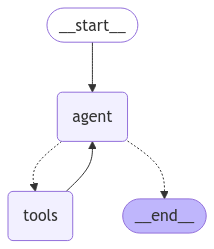

In [27]:
# Define the state type
class AgentState(TypedDict):
    messages: Sequence[BaseMessage]

llm = build_llm()

# Create the system message
system_message = SystemMessage(
    content="You are a web researcher. You may use the Tavily search engine to search the web for important "
    "information, so the Chart Generator in your team can make useful plots."
)

# Initialize tools
tavily_tool = TavilySearchResults()
tools = [tavily_tool]
tool_node = ToolNode(tools)

async def call_model(state: AgentState) -> AgentState:
    """Call the model with the current state."""
    messages = state["messages"]
    result = await llm.bind_tools(tools).ainvoke(messages)
    return {"messages": [result]}

def should_continue(state: AgentState) -> Union[Annotated[str, "tools"], Annotated[str, "end"]]:
    """Determine if the agent should continue or stop."""
    last_message = get_last_message(state)
    did_ai_call_tools = (last_message.type == "ai" and 
                        hasattr(last_message, "tool_calls") and 
                        bool(last_message.tool_calls))
    return "tools" if did_ai_call_tools else END

# Create the graph
researcher_graph = (
    StateGraph(AgentState)
    .add_node("agent", call_model)
    .add_node("tools", tool_node)
    .add_edge(START, "agent")
    .add_edge("tools", "agent")
    .add_conditional_edges(
        "agent",
        should_continue,
        {
            "tools": "tools",
            END: END,
        }
    )
)

# Compile the graph
researcher_agent = researcher_graph.compile()

display(Image(researcher_agent.get_graph().draw_mermaid_png()))


In [34]:
result = await researcher_agent.ainvoke({
    "messages": [
        HumanMessage(content="Who was Abraham Lincoln?")
    ]
})

print(result['messages'][-1].content)

Abraham Lincoln was the 16th President of the United States, serving from March 1861 until his assassination in April 1865. He is best known for leading the country during the American Civil War and for his efforts to abolish slavery. Lincoln was born on February 12, 1809, in Hardin County, Kentucky, and grew up in Indiana and Illinois.

Before his presidency, Lincoln worked as a lawyer and served in the Illinois State Legislature and the U.S. House of Representatives. He gained national prominence as a member of the Republican Party, which opposed the expansion of slavery into the territories.

Lincoln's presidency was marked by significant events, including the secession of Southern states, the Civil War, and the issuance of the Emancipation Proclamation in 1863, which declared that all slaves in Confederate-held territory were to be set free. He also delivered the Gettysburg Address, a famous speech that emphasized the principles of human equality and the importance of preserving th

## Graph Generation Agent